# Begin

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

In [616]:
file_list = []
for dirPath, dirNames, fileList in os.walk('kidney/output/'):
    for fileName in fileList:
        file_list.append(os.path.join(dirPath, fileName))

In [600]:
t = []
for dirPath, dirNames, fileList in os.walk('kidney/'):
    for f in fileList:
        t.append(dirPath+'/'+f)

In [617]:
# get all tamplate path
def get_all_tmp(tmp_path):
    tmp_list = []
    for dirPath, dirNames, fileList in os.walk(tmp_path):
        for f in fileList:
            if 'tmp' in dirPath:
                tmp_list.append(dirPath + '/' + f)
    return tmp_list

In [618]:
def check_kidney_side(img_path, tmp_list):
    # read image
    img = cv2.imread(img_path, 0)
    pic_name = f.split('/')[-1]
    tmp_result = {}
    
    # loop all template
    for tmp in tmp_list:
        template = cv2.imread(tmp, 0)
        kidney_side = tmp.split('/')[2].split('_')[0]
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        if kidney_side not in tmp_result:
            tmp_result[kidney_side] = 0
        tmp_result[kidney_side] += np.sum( res >= threshold)
    
    # check side
    if tmp_result['L'] > tmp_result['R']:
        tag = 'L'
    elif tmp_result['L'] < tmp_result['R']:
        tag = 'R'
    else:
        tag = 'other'
    print(img_path, " count: ", tmp_result, " final choose: ", tag)
    return tag

In [619]:
import time
st = time.time()
# main dircetory
m_directory = 'kidney/'

# all tmp
tmp_all = get_all_tmp(m_directory)

# parameter define
method = eval('cv2.TM_CCOEFF_NORMED')
threshold = 0.95  

all_data = {}
for f in file_list:
    label = check_kidney_side(f, tmp_all)
    f_name = f.split('/')[1] + '_' + f.split('/')[-1]
    f_path = f.split('/')[0] + '/' + f.split('/')[1] + '/'
    all_data[f_name] = label
    directory = f_path + label + '_pic/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    os.system("mv " + "./" + f + " ./" + directory)

# save df
df = pd.DataFrame.from_dict(all_data, orient = 'index', dtype = 'str')
df.to_csv(m_directory + 'index.csv')
print(time.time()-st)

kidney/output/3_33.png  count:  {'L': 0, 'R': 0}  final choose:  other
kidney/output/7_12.png  count:  {'L': 1, 'R': 0}  final choose:  L
kidney/output/6_7.png  count:  {'L': 0, 'R': 0}  final choose:  other
kidney/output/5_9.png  count:  {'L': 0, 'R': 2}  final choose:  R
kidney/output/3_35.png  count:  {'L': 0, 'R': 5}  final choose:  R
kidney/output/6_35.png  count:  {'L': 0, 'R': 0}  final choose:  other
kidney/output/3_7.png  count:  {'L': 0, 'R': 0}  final choose:  other
kidney/output/8_13.png  count:  {'L': 0, 'R': 1}  final choose:  R
kidney/output/6_13.png  count:  {'L': 1, 'R': 0}  final choose:  L
kidney/output/3_29.png  count:  {'L': 0, 'R': 0}  final choose:  other
kidney/output/6_15.png  count:  {'L': 0, 'R': 0}  final choose:  other
kidney/output/6_42.png  count:  {'L': 1, 'R': 0}  final choose:  L
kidney/output/8_10.png  count:  {'L': 0, 'R': 1}  final choose:  R
kidney/output/6_2.png  count:  {'L': 1, 'R': 0}  final choose:  L
kidney/output/3_24.png  count:  {'L': 0, '

# End

-0.49651041626930237   0.5541471838951111   (253, 378)   (79, 454)


/home/ktl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ktl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


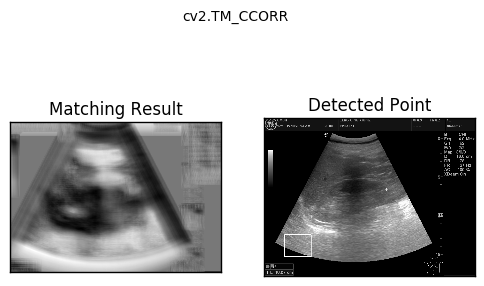

-0.4992433190345764   0.5464535355567932   (443, 242)   (79, 454)


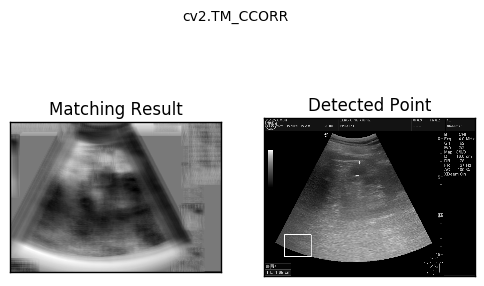

In [424]:
template = cv2.imread('kidney/R_side/6_24.png', 0)
w = template.shape[0]
h = template.shape[1]
h = int(1.25*h)
w = int(1.25*w)
all_data = {}
method = eval('cv2.TM_CCOEFF_NORMED')
for f in file_list[3:5]:
    img = cv2.imread(f, 0)
    img2 = img.copy()
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(min_val, " ", max_val, " ", min_loc, " ", max_loc)
    all_data[f.split('/')[-1]] = tag
    
    threshold = 0.8
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    
    top_left = max_loc
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    middle_point = [top_left[0] + w/2, top_left[1] + h/2]
    
    # left side
    
    right_kidney = img[top_left[1]:(top_left[1] + h), top_left[0]:(top_left[0] + w/2)]
    left_kidney = img[(top_left[1]):(top_left[1] + h), (top_left[0] + w/2):(top_left[0] + w)]
    
    if np.sum(right_kidney ==0) < np.sum(left_kidney ==0):
        tag = 'right'
    else:
        tag = 'left'
    all_data[f.split('/')[-1]] = tag
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

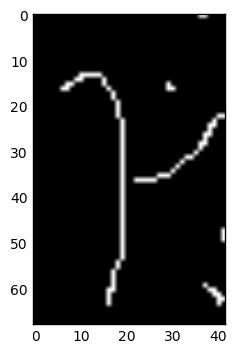

In [387]:
img = cv2.imread(f)
# cv2.rectangle(left_side,(610, 530), (700, 600), 255, 2)
plt.imshow(right_kidney,cmap = 'gray')
plt.show()
plt.close()

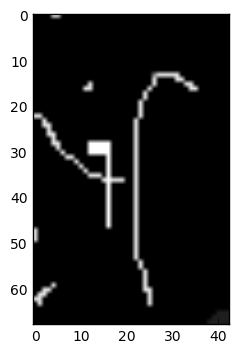

In [388]:
plt.imshow(left_kidney,cmap = 'gray')
plt.show()
plt.close()

In [180]:
left_side = img[top_left[1]:top_left[1] + h/2, top_left[0]:top_left[0] + w/2]
right_side = img[top_left[1] + h/2:top_left[1] + h, top_left[0] + w/2:top_left[0] + w]

In [147]:
img = cv2.imread(f)
# cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.imshow(img,cmap = 'gray')
plt.show()
plt.close()

kidney/output/8_8.png   left:  65280  right:  31365


In [280]:
t = pd.DataFrame.from_dict(all_data,orient='index', dtype = 'str')
t.to_csv('K_position.csv')